# Question 1: Use cases


** 1. Forecasting the next unit quanity a user might order: ** Considering the data contains the timestamp of each transaction done by the user, an univariate time series analysis maight be fittable for predicting the number of items (quantity) a user might require in the next transaction. This first approach have its limitations due it is necessary to fit a series per item and user, which is costly. Yet this perspective could lead to further models that may result more valuable. 
***Models: ARMA (Maybe ARIMA if there is any presence of a trend) might be enough for exploration due in this case is not probable variance would ve variable in time.***

** 2. Optimizing stock: ** Based on the logic exposed in the first use case, a time series anaysis of a summarized sold count by item and timestamp, could be performed in order to predict the probable required quantity stock in the next period (day according to time granularity) by item.
***Models: Same of first use case. Other approaches could be testes such as ARCH and GARCH if variance is not constant over time.***

** 3. Expanding use cases 1 and 2 to multivariate time analysis using LSTM networks: ** As imeplementing multivariate econometric models might result quite complex, LSTM networks instead, are another approach that may fit well for including multiple variables in our expanded analysis for cases 1 and 2.

** 4. A recommender system: ** As the dataset contains a track of items the clients have purchased, it is possible to implement a recommender system based on Collaborative Filtering. Such algorithm requires to measure the similarty between clients and the "rating" a client may give to the items he bought. Hence, as further features giving more details about each transaction are included, the ratings could be inferred considering features as "purchased total quantity by item", "Cost average by request and user", among others. Consequently mesauring the similarty between clients is possible using those ratings by applying any correlation statistic (Pearson, Spearman, what would fit best).

** 5. Churn analysis: ** Certainly, what would generate the bigger value to a company regarding this dataset is predicting whether a client will churn or not. Thus this analysis turns out a classification problem.

# Question 2:  Selected use case -> Churn analysis
 
 
 First of all, it is always interesting to implement an initial model to obtain some relevant insights regarding the state of the data and also to obtain an initial benchmark to compare if the final model (other type of model of course) after applying cleaning,  preprocessing and feature engineering stages, was improved or not. In this case, as is a classification problem a logistic regression is a good option.
 
 Once the outcomes generated by this initial model, analyse them and perceive some inconsistencies to generate a guideline about how the feature engineering must be implemented, consquently, a good data cleaning and preprocessing, is fundamental.
 
 At this point, modeling by using more sophisticated techniques, is possible. 
 
 Finally, having conclusions, testing and analyse whether the outcomes of any implementation of these techiques make sense or not, would be the step before analysing which can be imporoved. 


# Question 3 and 4.1:  Explanations are available in each step

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

%matplotlib inline

### Reading JSON

Data files below 100 MB, are well manageable with pandas. 

In [2]:
# Where your dataset is located
pd_df = pd.read_json('./data/challenge.json')
pd_df = pd_df.dropna()

In [3]:
pd_df.head()


,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82


## Initial Logistic regression: Analysing the current state of the data


***Creating dummies: *** Dummy variables are useful for representing categorical variables within a Logistic regression model

In [4]:
# Setting X (independent variables)
X = pd_df.drop(['is_churn','register_date'], axis = 1)
X = pd.get_dummies(X, columns=['group_code', 'segment_code', 'seller_code', 'sales_channel'], 
                    drop_first=True)
X.head(3)


,branch_id,customer_code,item_code,item_total_price,order_id,quantity,total_price,unit_price,group_code_1,group_code_2,...,sales_channel_96,sales_channel_97,sales_channel_98,sales_channel_99,sales_channel_100,sales_channel_101,sales_channel_102,sales_channel_103,sales_channel_104,sales_channel_105
0,0,143,854,292.91,21804,10,1613.53,25.04,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,433,246,287.19,5486,20,11163.69,12.33,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,486,1420,184.84,22662,12,6432.12,12.80,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Setting 'y' with column 'is_churn'
y = pd_df['is_churn']
# Parsing numpy (sci-kit logit model input)
y = [int(0) if i == np.float64(0.0) else int(1) for i in y.values]
y[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [6]:
# Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [7]:
log_model = LogisticRegression()
# Model traing
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

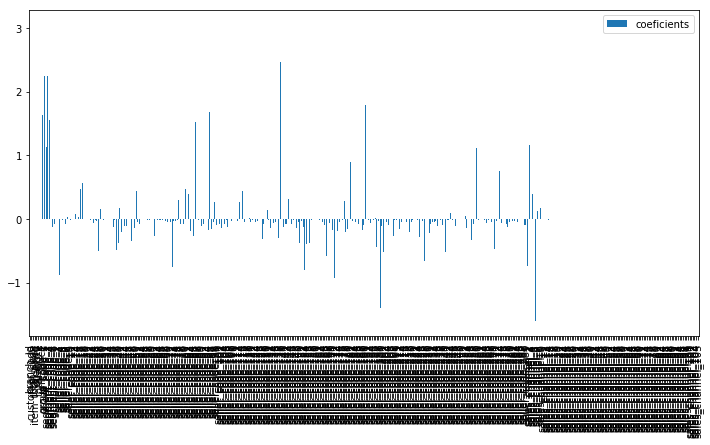

In [8]:
# Watching coeffcients
coeff_df = pd.DataFrame(log_model.coef_)
coeff_df.columns = X.columns
coeff_df = coeff_df.T
coeff_df.columns = ['coeficients']
coeff_df.plot(kind='bar', figsize=(12,6))

In [9]:
# Predict
y_predict = log_model.predict(X_test)

# Confusion matrix
metrics.confusion_matrix(y_test, y_predict)

array([[48037,  1093],
       [ 2333,  9291]])

In [10]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     49130
          1       0.89      0.80      0.84     11624

avg / total       0.94      0.94      0.94     60754



## Facts to consider:

The model presents a very "High precision and f1-score". Nevertheless, the confusion matrix shows there is a lot of false-negatives (churned customers marked as NOT churned) therefore, testing if the model is *** coherent *** is relevant considering the facts below: 

* As the Dataframe contains a complete purchasing track for each client, it is necessary to aggregate the data otherwise by using the data in its current state, might lead to a bad modeling. ** For instance: **
    
    - ** A SINGLE transaction would NOT be enough to determine whether a customer will churn or not. **
    - *** Few *** similar transactions done by a couple of clients where ONE churned indeed but the OTHER did not, could lead to some biases and unpredictable effects.

* Furthermore, several categorical variables represented as dummies usually do not work fine with this type of model.

* **Finally, by aggregating the dataframe is possible to look up for new relevant feaatures such as number of orders per user, the most frequent seller a client looks for,  the most preferred channel a client uses, segment code, etc. Possibilities are countless.**

## FINAL MODEL WORKFLOW

### Data preprocessing:

*** - Dataframe agregation ***

In [11]:
pd_df_aggregated = pd_df.groupby('customer_code').sum()
pd_df_aggregated = pd_df_aggregated.drop(['is_churn','branch_id', 'group_code', 'item_code', 'order_id', 
                                          'sales_channel', 'segment_code', 'seller_code', 'unit_price'], axis = 1)
pd_df_aggregated.head(5)

,item_total_price,quantity,total_price
customer_code,,,
0,84322.67,1666,785677.26
1,90843.02,3217,1083620.64
2,97535.97,3204,841537.44
3,383621.46,10124,5102786.19
4,104040.89,4383,1076850.86


*** - Removing meaningless outcome variables when aggregating the dataframe ***

    * is_churn -> categorical (must be aggregated using mas intead of sum)
    * branch_id -> Always 0 (deleted)
    * group_code -> cateogrical (must be aggregated using mas intead of sum)
    * -- item_total_price -> The preferred product by an user, may represent the same thing
    * order_id -> irrelevant (deleted)
    * sales_channel -> categorical (new feature)
    * segment_code -> categorical (must be aggregated using max intead of sum)
    * seller_code -> categorical (new feature)
    * unit_price -> A new feature representing the mean instead of sum is more coerent. (new feature)
    

*** - Creating new features ***

In [12]:
# is_churn by customer
pd_df_aggregated['is_churn'] = [int(i) for i in pd_df.groupby('customer_code').max()['is_churn']]
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn
customer_code,,,,
0,84322.67,1666,785677.26,0
1,90843.02,3217,1083620.64,0
2,97535.97,3204,841537.44,0


In [13]:
# Numer of transactions By Customer
pd_df_aggregated['num_orders'] = pd_df.groupby('customer_code').count()['is_churn']
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn,num_orders
customer_code,,,,,
0,84322.67,1666,785677.26,0,179
1,90843.02,3217,1083620.64,0,471
2,97535.97,3204,841537.44,0,307


In [14]:
# Group code by customer
pd_df_aggregated['group_code'] = [str(i) for i in pd_df.groupby('customer_code').max()['group_code']]
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn,num_orders,group_code
customer_code,,,,,,
0,84322.67,1666,785677.26,0,179,0
1,90843.02,3217,1083620.64,0,471,0
2,97535.97,3204,841537.44,0,307,0


In [15]:
# Group code by customer
pd_df_aggregated['segment_code'] = [str(i) for i in pd_df.groupby('customer_code').max()['segment_code']]
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn,num_orders,group_code,segment_code
customer_code,,,,,,,
0,84322.67,1666,785677.26,0,179,0,0
1,90843.02,3217,1083620.64,0,471,0,0
2,97535.97,3204,841537.44,0,307,0,0


In [16]:
# Preferred seller by customer
pd_temp = pd_df.groupby(['customer_code', 'seller_code']).count()
cust_list, seller_code = list(), list()
for index in pd_temp.index:
    cust_list.append(index[0])
    seller_code.append(index[1])
pd_temp['customer_code'] = cust_list
pd_temp['seller_code'] = seller_code

preferred_sellers = list()
for customer in set(cust_list):
    temp = pd_temp.loc[pd_temp['customer_code'] == customer]
    max_sells = temp.loc[temp['branch_id'].idxmax()]['branch_id']
    preferred_sellers.append(str(int(temp.loc[temp['branch_id'] == max_sells]['seller_code'].iloc[0])))

pd_df_aggregated['preferred_seller'] = preferred_sellers
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn,num_orders,group_code,segment_code,preferred_seller
customer_code,,,,,,,,
0,84322.67,1666,785677.26,0,179,0,0,153
1,90843.02,3217,1083620.64,0,471,0,0,154
2,97535.97,3204,841537.44,0,307,0,0,224


In [17]:
# Preferred item by channel
pd_temp = pd_df.groupby(['customer_code', 'sales_channel']).count()

cust_list, sales_channel_list = list(), list()
for index in pd_temp.index:
    cust_list.append(index[0])
    sales_channel_list.append(index[1])
pd_temp['customer_code'] = cust_list
pd_temp['sales_channel'] = sales_channel_list

preferred_channels = list()
for channel in set(cust_list):
    temp = pd_temp.loc[pd_temp['customer_code'] == channel]
    max_channel = temp.loc[temp['branch_id'].idxmax()]['branch_id']
    preferred_channels.append(str(int(temp.loc[temp['branch_id'] == max_channel]['sales_channel'].iloc[0])))

pd_df_aggregated['preferred_channel'] = preferred_channels
pd_df_aggregated.head(3)

,item_total_price,quantity,total_price,is_churn,num_orders,group_code,segment_code,preferred_seller,preferred_channel
customer_code,,,,,,,,,
0,84322.67,1666,785677.26,0,179,0,0,153,0
1,90843.02,3217,1083620.64,0,471,0,0,154,1
2,97535.97,3204,841537.44,0,307,0,0,224,0


### Exploratory analysis

It may exist some collinearity bewteen 'item_total_price', 'quanity' and 'total_price'. Thus, through a correlation measurment or a scatterplot, this effect could be appreciated


**Comparing collinearity** 

In [18]:
pd_df_aggregated.corr(method='pearson', min_periods=1)

,item_total_price,quantity,total_price,is_churn,num_orders
item_total_price,1.000000,0.998081,0.987569,0.133786,0.547907
quantity,0.998081,1.000000,0.984400,0.129888,0.560333
total_price,0.987569,0.984400,1.000000,0.109945,0.425554
is_churn,0.133786,0.129888,0.109945,1.000000,0.145132
num_orders,0.547907,0.560333,0.425554,0.145132,1.000000


A strong correlation between 'item_total_price', 'total_price' and 'quantity' exists, thus considering just one may be enough for overcoming collinearity issue.

In [19]:
pd_df_aggregated = pd_df_aggregated.drop(['item_total_price','total_price'], axis = 1)
pd_df_aggregated.head(3)

,quantity,is_churn,num_orders,group_code,segment_code,preferred_seller,preferred_channel
customer_code,,,,,,,
0,1666,0,179,0,0,153,0
1,3217,0,471,0,0,154,1
2,3204,0,307,0,0,224,0


### Some graphics

- ** Churn vs Groups **

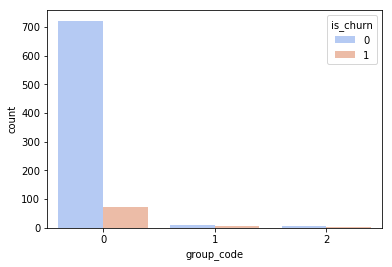

In [20]:
sns.countplot('group_code',data=pd_df_aggregated,hue='is_churn',palette='coolwarm')

* In group code 1, customers proportionally churn more often than in group code 0. 
* Nevertheless, we have unbalanced data.

- ** Churn vs Segment **

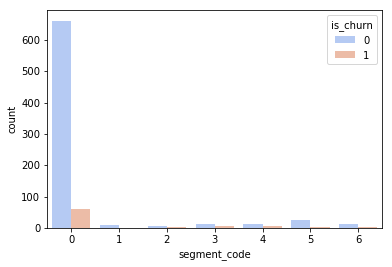

In [21]:
sns.countplot('segment_code',data=pd_df_aggregated,hue='is_churn',palette='coolwarm')

* In segment code 3, churn is more frequent than in group code 0. 

- ** Churn vs Channel **

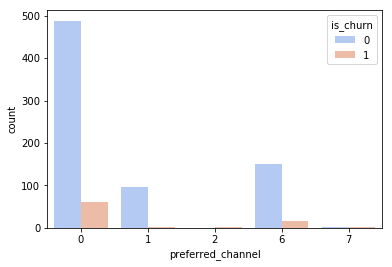

In [22]:
sns.countplot('preferred_channel',data=pd_df_aggregated,hue='is_churn',palette='coolwarm')

* Based on the graph, 'preferred_channel' does not have any statistical significance over churned and not churned customers. The only channels where the pattern is different are 2 and 7 but because of the lack of data in them, it is better to remove this variable.
**OBS:** (ANOVA test would fit correctly for demostrating more precisely such unexistent significance). 

In [23]:
pd_df_aggregated = pd_df_aggregated.drop(['preferred_channel'], axis = 1)
pd_df_aggregated.head(3)

,quantity,is_churn,num_orders,group_code,segment_code,preferred_seller
customer_code,,,,,,
0,1666,0,179,0,0,153
1,3217,0,471,0,0,154
2,3204,0,307,0,0,224


- ** Churn vs Num. Transactions **

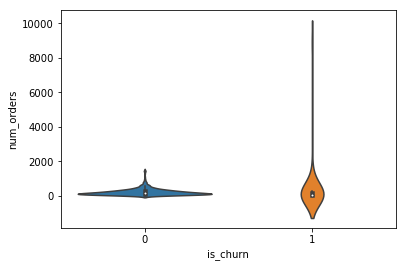

In [24]:
sns.violinplot(data=pd_df_aggregated, x='is_churn', y = 'num_orders')

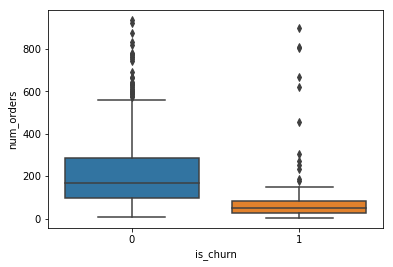

In [25]:
# Watching witout outliers
sns.boxplot(data=pd_df_aggregated.loc[pd_df_aggregated['num_orders'] < 1000], x='is_churn', y = 'num_orders')

* Customers with the fewer num. of orders, churn more often

- ** Churn vs Quantity **

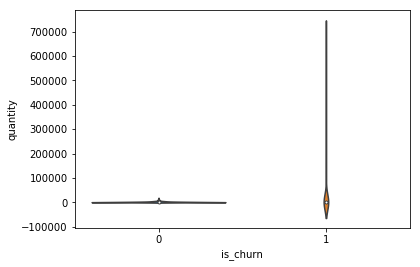

In [26]:
sns.violinplot(data=pd_df_aggregated, x='is_churn', y = 'quantity')

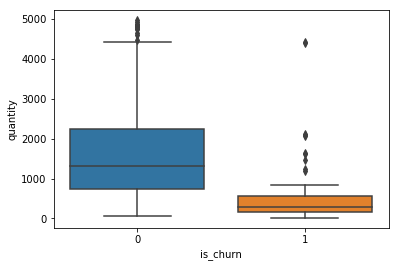

In [27]:
# Watching witout outliers
sns.boxplot(data=pd_df_aggregated.loc[pd_df_aggregated['quantity'] < 5000], x='is_churn', y = 'quantity')

* Appearently, customers with the fewer quantity of purchased items, churn more often

We've seen the prescence of outliers in 'quantity' and 'num.transactions' variables, however filtering them is not recommended due other features regarding those registers, might contain relevant data the model will consider.

Hence a good type of model capable of dealing correctly with this effect is required. Some options are SVM, Random forests (Decision trees are very good dealing with outliers) or perceptron neural network. 

In [28]:
# Outcome Dataframe
pd_df_aggregated.head(3)

,quantity,is_churn,num_orders,group_code,segment_code,preferred_seller
customer_code,,,,,,
0,1666,0,179,0,0,153
1,3217,0,471,0,0,154
2,3204,0,307,0,0,224


## Random Forest implementation

As Decision trees deal well with outliers and as Random forest is an ensemble algorithm (or bagging) that will consider the outcome of several decision trees in order to generate its own, Random forest is the chosen algorithm for this exercise.

For our model training, Crossvalidation strategy will enhace even further its performance by resampling the data randomly in fix-sized folds, helping to deal a little bit better with bias/overfitting and *** inbalanced data *** (as is gonna be presented later).  

** - Creating new dummies **

In [29]:
# Dummies
X = pd.get_dummies(pd_df_aggregated, columns=['group_code', 'segment_code', 'preferred_seller'], 
                    drop_first=True)
X = X.drop(['is_churn'], axis = 1)
X.head(3)

,quantity,num_orders,group_code_1,group_code_2,segment_code_1,segment_code_2,segment_code_3,segment_code_4,segment_code_5,segment_code_6,...,preferred_seller_89,preferred_seller_9,preferred_seller_90,preferred_seller_91,preferred_seller_92,preferred_seller_94,preferred_seller_95,preferred_seller_96,preferred_seller_98,preferred_seller_99
customer_code,,,,,,,,,,,,,,,,,,,,,
0,1666,179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3217,471,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3204,307,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = pd_df_aggregated['is_churn']

In [31]:
# Splitting the training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:
%%time
precision_cache = []

# Crossvalidation
kf = KFold(n_splits=5)

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1)

for k, (train_index, test_index) in enumerate(kf.split(X_train)):
    print('########### Fold: ', k)
    x_temp_train, x_temp_test = X_train[train_index], X_train[test_index]
    y_temp_train, y_temp_test = y_train[train_index], y_train[test_index]
    rf.fit(x_temp_train, y_temp_train)
    y_predict = rf.predict(x_temp_test)
    precision = accuracy_score(y_temp_test, y_predict)
    precision_cache.append(precision)
    print(metrics.classification_report(y_temp_test, y_predict))
    
print('-' * 30)
print('Precision average', np.mean(precision_cache))
print('=' * 30)

########### Fold:  0
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       119
          1       0.67      0.33      0.44        12

avg / total       0.91      0.92      0.91       131

########### Fold:  1
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       112
          1       0.60      0.32      0.41        19

avg / total       0.85      0.87      0.85       131

########### Fold:  2
             precision    recall  f1-score   support

          0       0.91      0.98      0.95       114
          1       0.75      0.35      0.48        17

avg / total       0.89      0.90      0.88       131

########### Fold:  3
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       123
          1       0.50      0.12      0.20         8

avg / total       0.92      0.94      0.92       131

########### Fold:  4
             precision    recall  f

* ** Testing the model with test data **

In [33]:
# Testing Random Forest model with test data

y_predict = rf.predict(X_test)
metrics.confusion_matrix(y_test, y_predict)

array([[148,   4],
       [  9,   3]])

In [34]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       152
          1       0.43      0.25      0.32        12

avg / total       0.91      0.92      0.91       164



### Facts to consider

Watching the results and confusion matrix (huge ammount of false-negatives or churned customers marked as NOT churned), despite the high average precision (again), the recall and f1-score metrics, we can conclude the data we are dealing on, are highly **IMBALANCED** (as was mentioned before).

Altough the use of crossvalidation and a bagging algorithim in order to overcome this issue is intended to reduce this effect as minimum as possible, the best solution for this according to some literature is having "more data".

Some excelent advices in order to deal with such phenomena, are offered by *** Jason Brownlee *** [in his machine learning mastery web site](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)

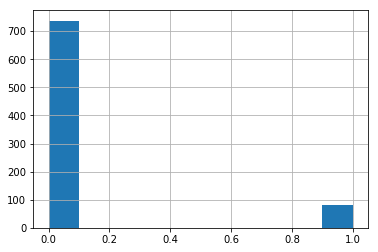

In [36]:
# Showing churn distribution by customer
pd_df_aggregated['is_churn'].hist()

# Question 4.1:

By considering the advices of the [link](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) shared above, several improvements can be done. Some options are:

* Perform a better sampling and achieve a higher level of representative samples.
* Testing with boosting algorithims and look how the data behaves when the bias is reduced.
* As it was mentioned before, further possible features could be extracted, thus explore those combinations is an issue to improve.
* Testing with ensemble algorithms such as stacking generalization.
* A/B testing executing the prediction with and without outliers (depending of the selected features).
* ** And mainly, Ask for further data or "Balanced Data" ( hehe, just a joke! ) **
